# Writing own Stochastic Gradeint Descent

#### Imports

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining some functions that we will be using later
#MSE and R2
#Taken from courses jupyterbook
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

### Generating data

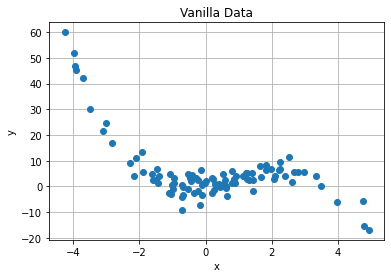

In [3]:
np.random.seed(10)
n = 100
x = 2 * np.random.randn(n,1)
y = -0.5*x**3 + 1.5*x**2 + 1.5*x + 3*np.random.randn(n,1)

plt.plot(x, y, 'o')
plt.title("Vanilla Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(1)
plt.show()

In [4]:
#Creating the design Matrix:
X = np.c_[np.ones((n, 1)), x, x**2, x**3]
#Defining the Hessian Matrix
H = (2.0/n) * X.T @ X
EigVal, EigVec = np.linalg.eig(H)
print(f"The eigenvalues of Hessian matrix are:{EigVal}")

The eigenvalues of Hessian matrix are:[1.47073846e+03 8.33372320e+01 1.26487821e+00 2.16734451e+00]


Because all eigenvalues of hessian matrix are positive, this means that the hessian matrix is positive definite. This means that the cost function is a convex function and we don't need to worry about getting stuck in some local minima.

MSE: 12.492756219593348
R2: 0.9130331770158633


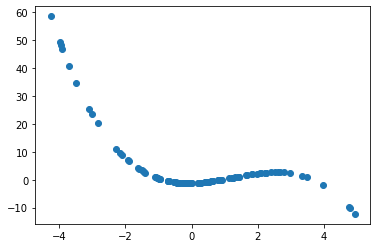

In [75]:
learn_rate = 1.0/np.max(EigVal) #The learning rate, this gives the lowest MSE
Beta = np.random.randn(4,1) #Pick random point for beta in order to start our iteration
N_iterations = 30

for i in range(N_iterations):
    gradient = (2.0/n) * X.T @ (X @ Beta - y)
    Beta = Beta - learn_rate*gradient

y_predict = X @ Beta
print(f"MSE: {MSE(y, y_predict)}")
print(f"R2: {R2(y, y_predict)}")
plt.plot(x, y_predict, "o")
plt.show()


Here dicuss a little bit about the learning rate. Why do we get error when learning rate is higher that 0.01. And why do we get really high MSE when learning rate goes to zero.

In [7]:
#Compare it with scikit:

#model = SGDRegressor(max_iter = 1000, penalty=None, eta0=0.001)
#model.fit(x,y.ravel())
#predict = model.predict(X)
# Not sure how to fix this error

## Adding momentum into the plain GD

Why implementing momentum? It goes fasterrr. Illustrate this with a drawing, say that the gradient descent kinda zigzags towards the minima. These zigzags takes up a lot of time, and prevents us from using low learning rate. 

MSE: 11.785658394561297
R2: 0.9179555536556623


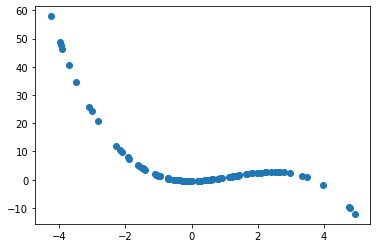

In [110]:
learn_rate = 1.0/np.max(EigVal) #The learning rate, this gives the lowest MSE
Beta = np.random.randn(4,1) #Pick random point for beta in order to start our iteration
N_iterations = 20
change = 0.0
momentum = 0.3
for i in range(N_iterations):
    gradient = (2.0/n) * X.T @ (X @ Beta - y)
    new_change = learn_rate*gradient + momentum*change
    Beta = Beta - new_change
    change = new_change

y_predict = X @ Beta
print(f"MSE: {MSE(y, y_predict)}")
print(f"R2: {R2(y, y_predict)}")
plt.plot(x, y_predict, "o")
plt.show()


Here we can see that we dont need as many iterations as we did without the momentum. The difference is small tho. Try making a MSE agains iteration number comparison.

### Stochastic Gradient Descent without momentum with time decaying learningrate